### Load the data


In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("/content/E-Commerce Data.xlsx - Orders.tsv", sep='\t')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,E-Commerce Site,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,2,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Snapdeal,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,3,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,Flipkart,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,4,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,Flipkart,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,5,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,Snapdeal,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           10000 non-null  int64  
 1   Order ID         10000 non-null  object 
 2   Order Date       10000 non-null  object 
 3   Ship Date        10000 non-null  object 
 4   Ship Mode        10000 non-null  object 
 5   Customer ID      10000 non-null  object 
 6   Customer Name    10000 non-null  object 
 7   Segment          10000 non-null  object 
 8   City             10000 non-null  object 
 9   State            10000 non-null  object 
 10  Country          10000 non-null  object 
 11  Region           10000 non-null  object 
 12  Market           10000 non-null  object 
 13  Product ID       10000 non-null  object 
 14  E-Commerce Site  10000 non-null  object 
 15  Category         10000 non-null  object 
 16  Sub-Category     10000 non-null  object 
 17  Product Name 

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Order Date']

,Order Date
0,11/11/2014
1,2/5/2014
2,10/17/2014
3,1/28/2014
4,11/5/2014
...,...
9995,8/13/2015
9996,12/26/2015
9997,11/1/2012
9998,11/19/2013


In [10]:
df['orderDate']=pd.to_datetime(df['Order Date'],dayfirst=False )

In [11]:
df['orderDate']

,orderDate
0,2014-11-11
1,2014-02-05
2,2014-10-17
3,2014-01-28
4,2014-11-05
...,...
9995,2015-08-13
9996,2015-12-26
9997,2012-11-01
9998,2013-11-19


In [12]:
df['orderDate'].isna().sum()

np.int64(0)

In [13]:
df['orderDate']=pd.to_datetime(df['orderDate'])

In [14]:
date=df['orderDate']

In [15]:
df['Sales']

,Sales
0,$221.98
1,"$3,709.40"
2,"$5,175.17"
3,"$2,892.51"
4,"$2,832.96"
...,...
9995,$579.45
9996,$319.56
9997,$504.72
9998,$414.24


In [16]:
df['Sales']=df['Sales'].replace('[\$,]',"",regex=True).astype(float)
df['Sales']

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3275070466.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Sales']=df['Sales'].replace('[\$,]',"",regex=True).astype(float)


,Sales
0,221.98
1,3709.40
2,5175.17
3,2892.51
4,2832.96
...,...
9995,579.45
9996,319.56
9997,504.72
9998,414.24


In [17]:
total_price=df['total_price']=df['Quantity']*df['Sales']
total_price

,0
0,443.96
1,33384.60
2,46576.53
3,14462.55
4,22663.68
...,...
9995,2897.25
9996,319.56
9997,1514.16
9998,3313.92


### Sales Performance


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set(style='whitegrid')

In [20]:
total_sales=df['total_price'].sum()
total_sales

np.float64(38470902.849999994)

In [21]:
monthly_sales=df.resample("M", on='orderDate')['total_price'].sum()

/tmp/ipython-input-1205255330.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales=df.resample("M", on='orderDate')['total_price'].sum()


In [22]:
monthly_sales

,total_price
orderDate,
2012-01-31,276433.73
2012-02-29,400590.04
2012-03-31,305478.73
2012-04-30,286146.85
2012-05-31,516711.91
2012-06-30,609859.40
2012-07-31,281508.27
2012-08-31,738809.79
2012-09-30,758944.71


In [23]:
top_categories=df.groupby('Category')['total_price'].sum().sort_values(ascending=True)

In [24]:
top_categories

,total_price
Category,
Office Supplies,8506678.19
Furniture,13905035.22
Technology,16059189.44


In [25]:
top_product=df.groupby('Product ID')['total_price'].sum().sort_values(ascending=True)

In [26]:
top_product

,total_price
Product ID,
OFF-AP-4739,2.22
OFF-AP-3558,2.60
OFF-FA-2916,2.63
OFF-BI-3740,2.69
OFF-LA-3201,2.89
...,...
FUR-CH-4654,278488.15
TEC-PH-5841,280221.34
TEC-PH-3806,346297.46


In [27]:
sales_by_region=df.groupby('Region')['total_price'].sum()

In [28]:
sales_by_region

,total_price
Region,
Canada,28599.03
Caribbean,959316.35
Central Africa,482394.21
Central America,4177874.86
Central Asia,24197.39
Central US,659496.81
Eastern Africa,337952.30
Eastern Asia,3461584.53
Eastern Europe,970622.70


In [29]:
avg_order_value=df.groupby('Order ID')['total_price'].sum().mean()

In [30]:
avg_order_value

np.float64(5108.339244456247)

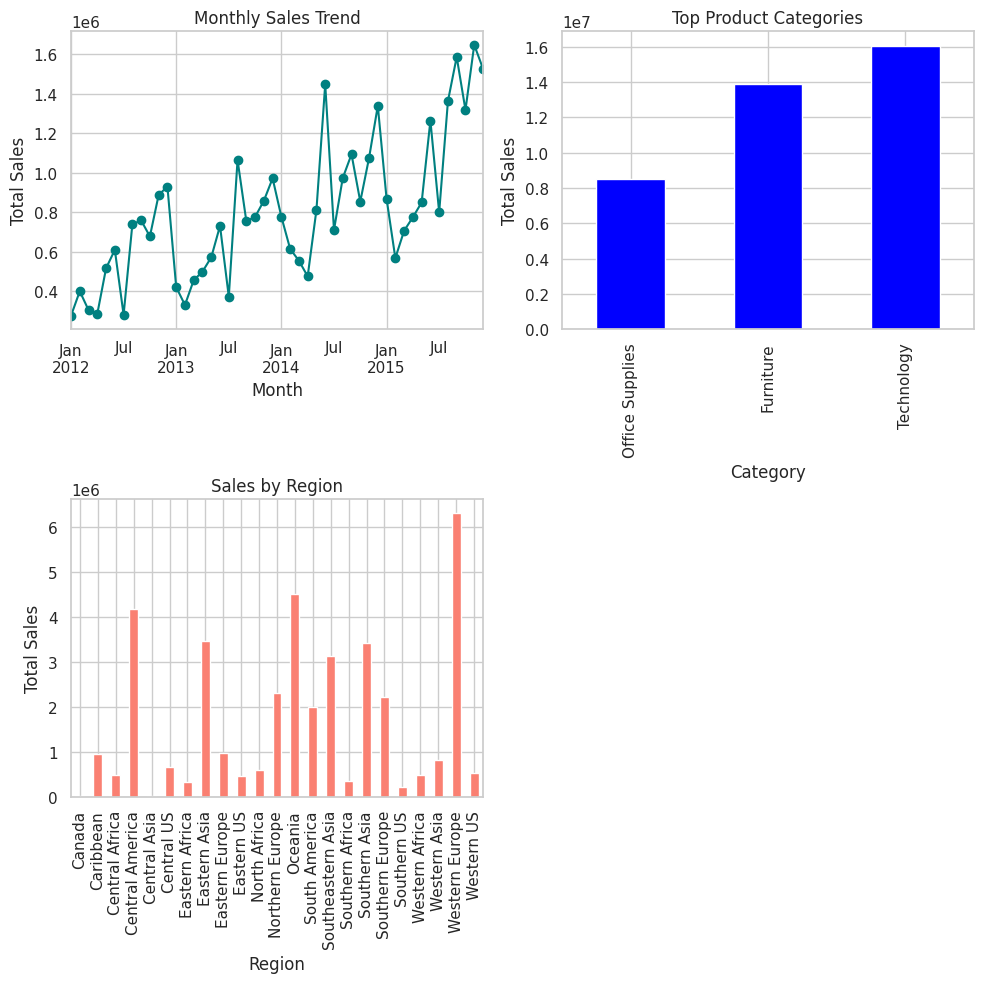

In [31]:
fig,axs=plt.subplots(2,2,figsize=(10,10))

monthly_sales.plot(ax=axs[0,0],marker='o',color='teal')
axs[0,0].set_title("Monthly Sales Trend")
axs[0,0].set_xlabel("Month")
axs[0,0].set_ylabel("Total Sales")

top_categories.plot(kind='bar',ax=axs[0,1],color='blue')
axs[0,1].set_title("Top Product Categories")
axs[0,1].set_ylabel("Total Sales")

sales_by_region.plot(kind='bar',ax=axs[1,0],color='salmon')
axs[1,0].set_title("Sales by Region")
axs[1,0].set_xlabel("Region")
axs[1,0].set_ylabel("Total Sales")

axs[1,1].axis('off')

plt.tight_layout()
plt.show()
